# Introduction to simulations with TVB
    Author: Jan Stasinski
    contact: jan.stasinski@bih-charite.de
    Charité Department of Neurology with Experimental Neurology, Brain Simulation Section

For the easiest use:
    - Place this notebook in 'TVB_Distribution/demo_scripts' directory.
    - Start a jupyter notebook from the 'TVB_Distribution/bin' directory by running the command corresponing to your OS.

In [1]:
# before we start we need to import the necessary tools:
import matplotlib.pyplot as plt
import numpy
import scipy.io as sio
from tvb.simulator.lab import * # this line imports all the basic tvb libraries necessary for simulations
%pylab nbagg

/Users/erichter/Documents/Uni/Charite/tvb/tvb-root/scientific_library/tvb/datatypes/surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


Populating the interactive namespace from numpy and matplotlib


### I. Connectivity object

TVB uses an python object called Connectivity to aggregate and manage the connectivity data.
main data elements that make up a Connectivity are:

**info.txt** 
    summary info about the connectivity matrix (eg, distance units, weights units), a vector to distinguish left 
    from right areas, etc. - non-essential

**weights.txt** <!!!>
    This file contains the connectome, that is a (un)weighted matrix whose values may represent units such as fibre density. Zeros in this matrix mean 'unconnected' areas. - ESSENTIAL FILE

**tract_lengths.txt** <!!!>
    This file contains distances between the areas. 
    **NOTE:** *If no tract-length data is provided, TVB can calculate tract-lengths 
    based on the Euclidean distance between centres.* - ESSENTIAL FILE

**cortical.txt**
    This file contains information (a vector) used to distinguish cortical from subcortical regions.

**centres.txt**
    This file contains the region labels (first columnn) and the list of Cartesian triplets (x,y,z) that specify 
    the spatial location of each region.

**average_orientations.txt**
    This file contains the average 'normal vectors' of the dipoles (regions) used to compute the forward solutions of EEG and MEG. 

**areas.txt**
    This file contains a vector of length number of regions specifying the area in [mm2] that each region represents.

**hemispheres.txt**
    This file contains information (a vector) used to distinguish hemispheres.

In [2]:
#### Loading and displaying structural connectivity
tvb_data = '/Users/erichter/Documents/Uni/Charite/TVB_Distribution/tvb_data/tvb_data/'
path_to_your_SC = tvb_data + 'connectivity/connectivity_76.zip'

In [3]:
def_conn = connectivity.Connectivity.from_file(path_to_your_SC)

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


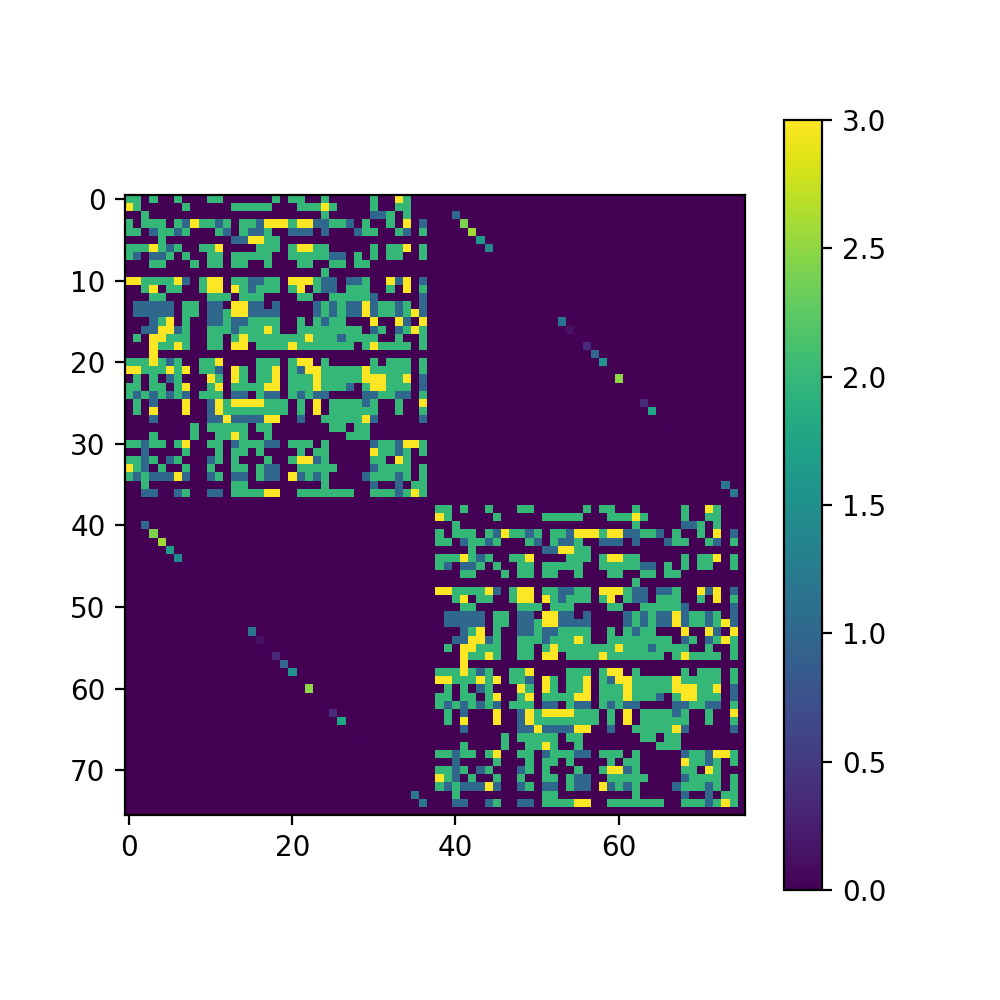

In [4]:
# basic python way using matplotlib
plt.figure(1,figsize=(5,5)) # creates a new figure and assign a number to it
plt.imshow(def_conn.weights) # runs matplotlib plt.imshow() funtion on the def_conn.weights array/ matrix
plt.colorbar() # this line displays a colorbar - helpful for interpreting the displayed values

#NOTE: if we did not use the %pylab nbagg command at the beginning of the notebook
# but used the 'from matplotlib import pyplot as plt' insted the plots would not be interactive

<IPython.core.display.Javascript object>


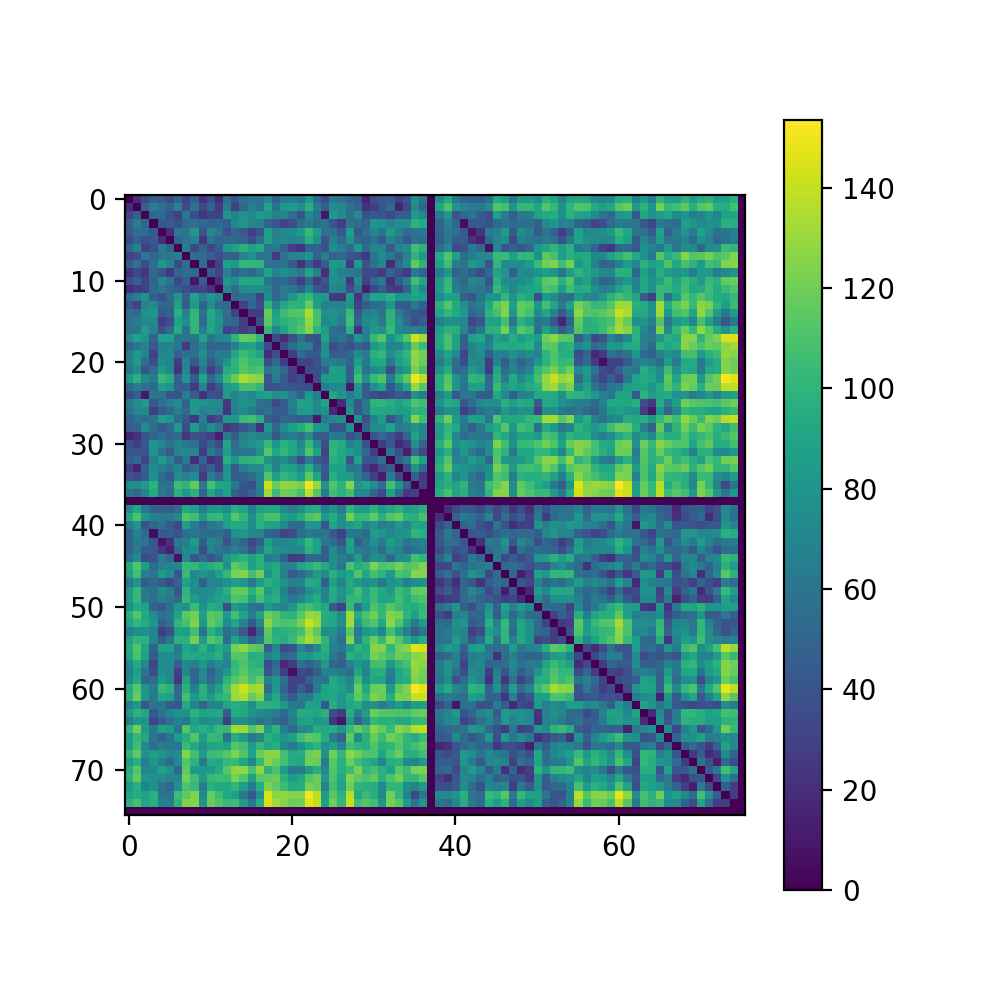

In [5]:
# we can do the same to see the tract lenghts:
plt.figure(2, figsize=(5,5))
plt.imshow(def_conn.tract_lengths)
plt.colorbar()

###### II.C Checking some other properties of connectivity data manually, using NumPy: you can compare the some of the results with the output of a: def_conn call

In [6]:
print(numpy.max(def_conn.weights))
print(numpy.mean(def_conn.weights))

3.0
0.5174594290367901


### III. NORMALIZING THE CONNECTOME.
###### III.A Manualy using NumPy
### there is also a tvb built in function in the connectivity class for that.. 
###### your_connectivity.scaled_weights(mode = 'tract') does the work

In [7]:
N = def_conn.weights.shape[0] # saving that to a variable for the following calculations
# removing self connections:
def_conn.weights = def_conn.weights - def_conn.weights*numpy.eye(N)
# normalizing the connectome:
def_conn.weights = numpy.divide(def_conn.weights, numpy.abs(numpy.max(def_conn.weights))) 
def_conn.configure()

<IPython.core.display.Javascript object>


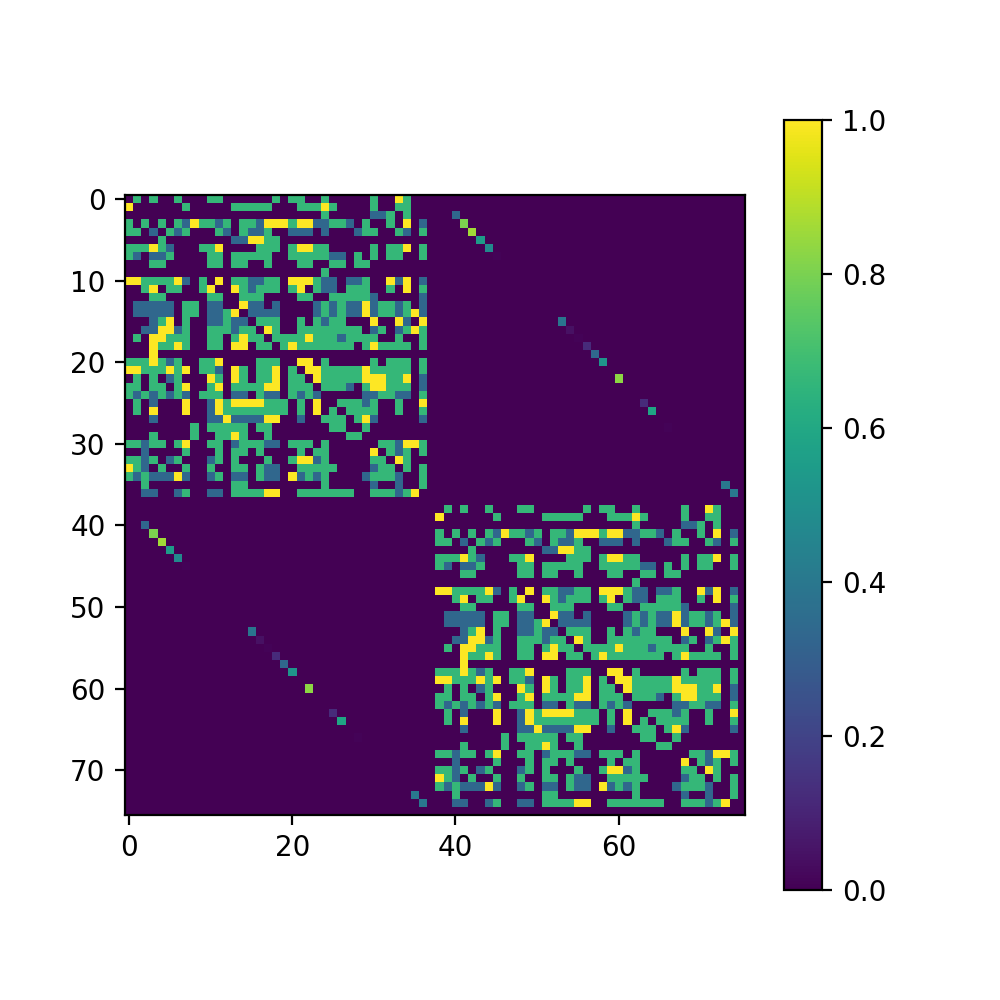

In [8]:
plt.figure(3,figsize=(5,5)) # creates a new figure and assign a number to it
plt.imshow(def_conn.weights) # runs matplotlib plt.imshow() funtion on the def_conn.weights array/ matrix
plt.colorbar()

In [10]:
# # Minimal approach - just the .txt files with weights or weights + tract_lenghts:
# your_data_folder = "/Users/jansta/TVB_Distribution/tvb_data/connectivity/lesion_PB"
# your_SC_weights = numpy.loadtxt(your_data_folder+"/weights.txt")
# your_SC_distances = numpy.loadtxt(your_data_folder+"/tract_lengths.txt")
# your_SC_region_labels = numpy.loadtxt(your_data_folder+"/region_labels.txt")
# your_SC_centres =  numpy.loadtxt(your_data_folder+"/centres.txt")

# yourSC = connectivity.Connectivity(weights=your_SC_weights, tract_lengths=your_SC_distances,
#                                    region_labels =your_SC_region_labels, centres=your SC_centres)
# yourSC.configure()

### II. NMM: Neural mass model:
###### model is basically a set of differential equations describing the evolution of state variables in time. Models can have different purposes and can descibe different neural processes. Some like Generic2Oscillator are only loosely related to neural processes. Other like Reduced Wong Wang focus on the the synaptic activity and firing rates of neural masses. 

In [9]:
# The basic generic model:
oscillator = models.Generic2dOscillator(a=numpy.array([1.74]))
oscillator # shows you parametes of the model - if you do not specify them in the line above --> defaults

In [13]:
#### Phase plane 

#they can be explored using the phase plane tool

Create An Interactive Phase-Plane
PhasePlaneInteractive produces an interactive window containing plots of a Model's phase-plane, sample trajectories, and sliders and buttons for adjusting various parameters.

Here you can visualize <in 2D> the behavior of the model and it state variables. From the literature, we know that changing the parameter 'a' above the critical value 1.74 it causes model to oscillate.
The trajectory converged to a fixed point (the intersection of the nullclines) before and after adjusting the parameter 'a' in reaches the stable limit cycle. This can be seen at the bottom plot as an oscillation. 

NOTE: as we drag around the sliders for the Model's parameters we are actually modifying the parameters of the Model we passed in, so when we close the figure at the end whatever values the Model's parameters are set to will be the values in the Model. Also, changing the range of the phase-plane plot (that is, the extent of the x and y axis) changes the "state_variable_range" attribute of a Model. This attribute is used when constructing random initial conditions for a simulation, so setting the axis to be relatively tightly bound around a fixed point for example will produce initial conditions that better approximate the range of the Model's state variables for the given parameters.

###### TASK 1:
    - try adjusting the parameters and and the step size (dt) of the integrator to examine different behaviors of the model

In [14]:
# lets get us one more tool to help us visualize the behavior of the model
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive

<IPython.core.display.Javascript object>


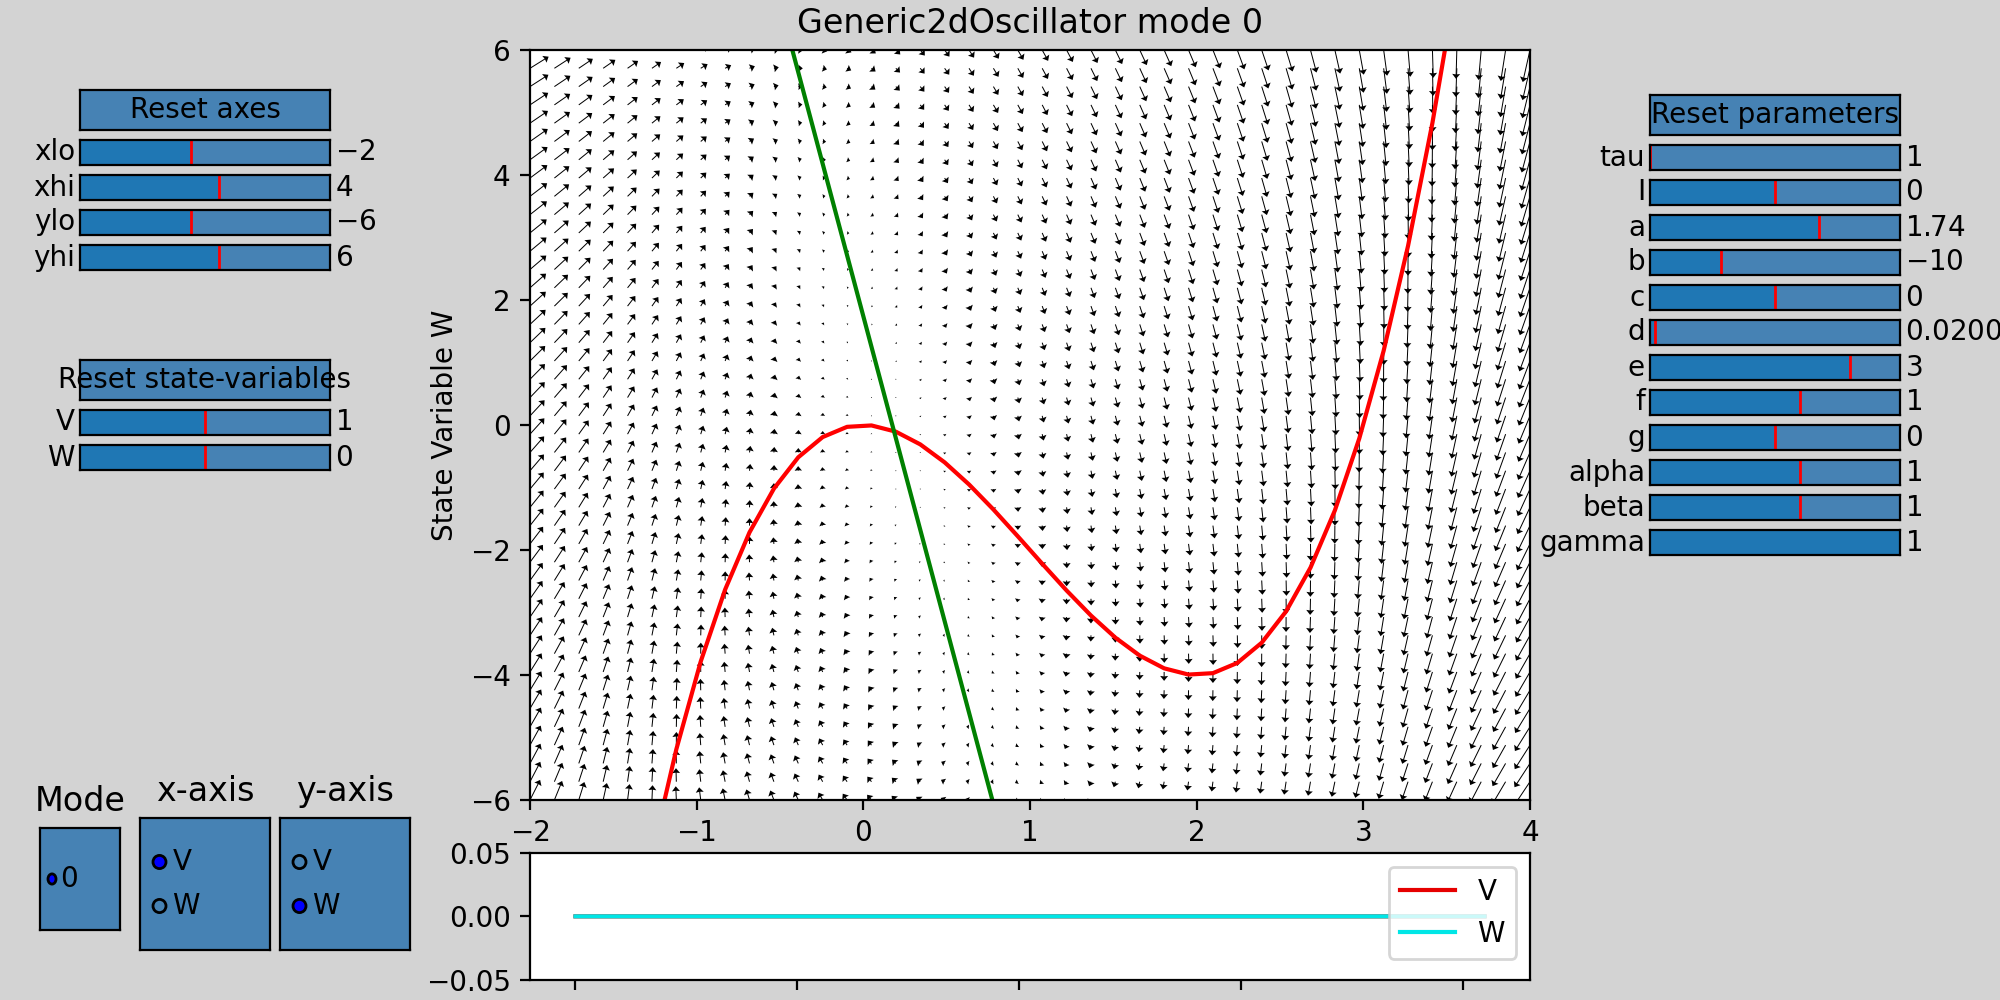

In [15]:
ppi_fig = PhasePlaneInteractive(model=oscillator, integrator=integrators.HeunDeterministic(dt=0.1))
ppi_fig.show()

###### About the generic 2D oscillator model
    Generalization/ based on the biophysiological model by FitzHugh-Nagumo.
    Model describing the dynamics between local field potential/ (average membrane potential to be exact) and the recovery rate of given neuronal population, 
    In this case: 
        V can be interpreted as mean local field potential of given region - potential
        W can be interpreted as the mean recovery rate of that population -  current
###### Hopf bifurcations:
    supercritical - when system's stable equilibrium becomes unstable or stable when it was unstable 
    subcritical - when system's unstable equilibrium becomes stable

        Also, a periodic solution, a limit cycle, is born that inherits the stability properties that the equilibrium had before the occurrence of the bifurcation.

    Fixed point at the intersection of the nullclines: stable → unstable
    As the a>1.74 the new periodic attractor appears → a stable limit cycle.

### III. Global Coupling Function.
Choose a function modulating the effect of the incoming brain activity (chosen state variable/s) of all the nodes connected to a single node.  Signals from the connected brain regions (in your Structural Connectivity) pass through this function before entering the equations of a Model describing the local dynamics. The main purpose of this function is to ‘rescale’ the incoming activity to the level appropriate to the local model. When selecting Long range coupling function consider: Using parameter exploration.

In [10]:
global_coupling = coupling.Linear()
#coupling.<press_Tab> - to see other options

### IV.  Integration scheme:
Integration scheme selection for the main simulation. INTERGRATION is an algebraic method of solving differential equations used within the model. The schemes are either deterministic or stochastic. 
Basic selection from: Euler, Heun, RK4
Configure noise (only for stochastic integration methods): Set up the “noise dispersion” for each state variable of the model at each node - default: the same of all of the nodes

In [11]:
heundetint = integrators.HeunDeterministic(dt=1) # dt is in milliseconds
heunstochint = integrators.HeunStochastic(dt=1) # dt is in milliseconds

### V.Monitors
Monitors are tools used to interpret, simplyfy and downsample the output of simulations. 
More often then not the raw output of neural mass models is both very large in size and difficult to interpret. In brief, the are two types of monitors: low- and high-level. Low-level monitors downsample or average the data, and high-level monitors produce output that resembles biophysical signals such as EEG, MEG, or BOLD signal using various transformations of the raw signal (by this I mean a chosen state variable of the model)

In [12]:
mon_raw= monitors.Raw()
mon_tavg = monitors.TemporalAverage(period=10.)
what_to_watch = (mon_raw, mon_tavg)

### VI. Putting all the elements together and initializing the simulator.
This step runs basic sanity checks and error checks so that the specification of variables and processes is consistent

In [15]:
sim = simulator.Simulator(
    model=oscillator, 
    connectivity=def_conn,
    coupling=global_coupling, 
    integrator=heundetint, 
    monitors=what_to_watch, 
    simulation_length=5000)

sim.configure()

In [20]:
### word on initial conditions.

### VII. Running a simulation:
We have defined two monitors: raw and temporal average and the line below stores the output of the first simulation in 4 variables, 2 for each of the monitors, one for the time, and one for the time-series - state variable of interest, filtered by the monitor's function.

output structure: 4-D array [time, state variables, space (nodes), modes]

In [16]:
(traw, raw), (ttavg, tavg) = sim.run() ## .run() does the trick
print(raw.shape)
print(tavg.shape)

WARNING  random_state supplied for non-stochastic integration
(5000, 1, 76, 1)
(500, 1, 76, 1)


<IPython.core.display.Javascript object>


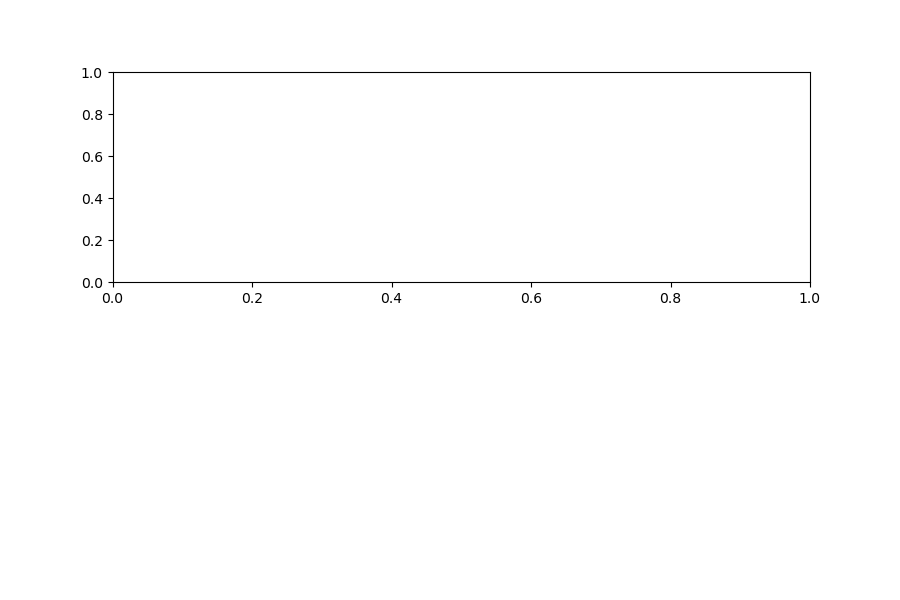

NameError: name 'raw' is not defined

In [48]:
### Basic plotting of the stored variables:
#Plot region averaged time series
plt.figure(5, figsize=(9,6))
plt.subplot(211)
plt.plot(raw[:,0,:5,0]) ## only 5 nodes chosen here
plt.title("RAW Monitor- output")
plt.subplot(212)
plt.plot(tavg[:,0,:5,0]) ## only 5 nodes chosen here
plt.title("Temporal Average Monitor- output")
plt.tight_layout()
plt.show()

### PART II. Supplement on the integration schemes:

In [22]:
step_size = 1 # storing a fixed step size for different simulations

noise_add = noise.Additive(nsig=numpy.array([1e-4]))# here the value used is a bit too high on purpose 
                                    # to demonstrate the effects of noise while plotting

euler_det = integrators.EulerDeterministic(dt = step_size)
euler_stoch = integrators.EulerStochastic(dt = step_size, noise = noise_add)
heun_det = integrators.HeunDeterministic(dt = step_size)
heun_stoch = integrators.HeunStochastic(dt = step_size, noise = noise_add)
rk4_det = integrators.RungeKutta4thOrderDeterministic(dt = step_size)

solvers = [euler_det, euler_stoch, heun_det, heun_stoch, rk4_det]

In [23]:
mon_tavg = monitors.TemporalAverage(period = 1)

In [24]:
t_series = []
time_array = []
for solver in solvers:
    sim = simulator.Simulator(model=oscillator, connectivity=def_conn, coupling=global_coupling,
                              integrator=solver, monitors=[mon_tavg])
    sim.configure()
    tavg = sim.run(simulation_length=3000) # actually running the simulation
    t_series.append(tavg[0][1]) # splitting the output for convenient plotting
    time_array.append(tavg[0][0])
    #outputs[solver] = tavg

WARNING  random_state supplied for non-stochastic integration
WARNING  random_state supplied for non-stochastic integration
WARNING  random_state supplied for non-stochastic integration


###### A WORD of EXPLANATION REGARDING THE OUTPUT ARRAYS:
Output of all five simuations is stored in 'tavg' variable which we then split into two lists of lists:
    - t_series list contains 5 arrays for each of the simulation (corresposing to the number of integrators we are testing)
    - time_array contains information about the timepoints at which the each of the state variables, for each integration scheme, were calculated
    
###### REMINDER: Basic monitors output structure: 4-D array  [time, state variables, space (nodes), modes]
    - so in the code below: t_series[i][:,0,:,0], i corresponds to a simulation index from 0 to 4


<IPython.core.display.Javascript object>


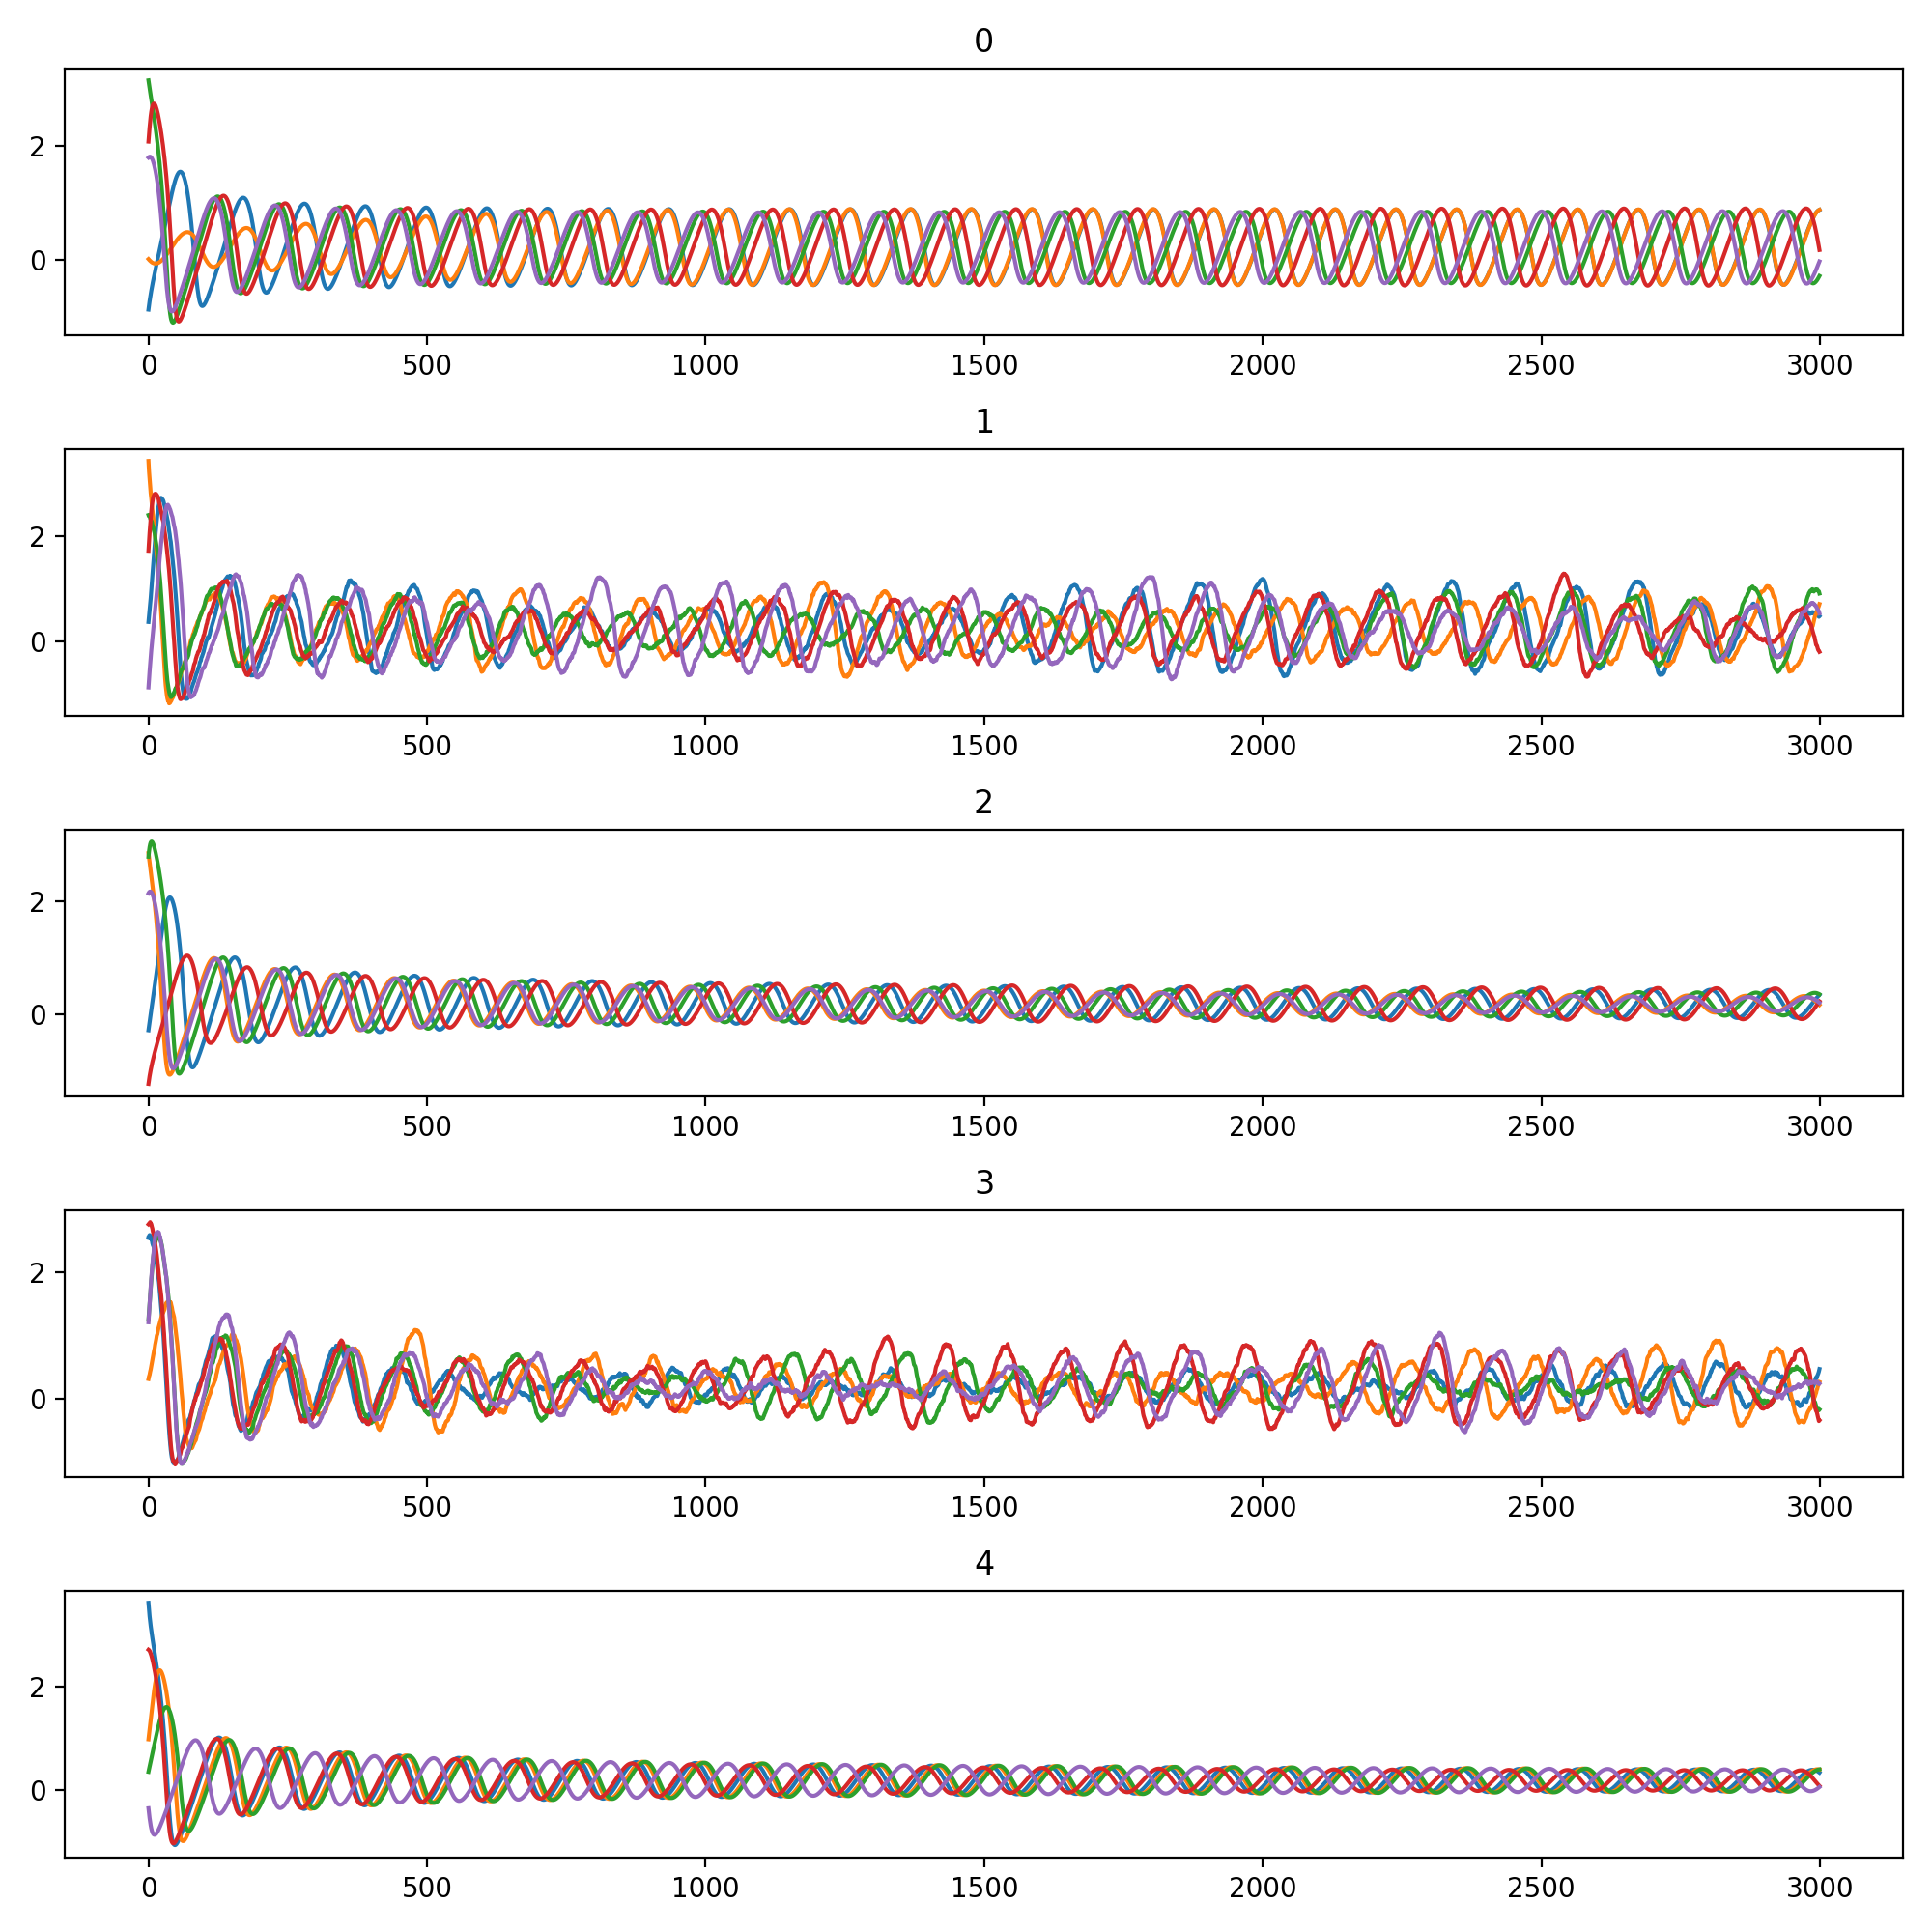

In [25]:
plt.figure(6, figsize=(10,10) )

for i in range(len(solvers)):
    plt.subplot(len(t_series), 1, i+1)
    plt.title(str(i))
    plt.plot(t_series[i][:,0,:5,0])
    
plt.tight_layout()
plt.show()

As you can see, even though we are using the same connectome and the same model with the same parameters, the output of all five simulations differs slightly. In general the Euler method is the most basic, Heun method is slighlty more precise and RK4 method is the most sofisticated mathematically.¶
Task 1:
- look at the output for different integration schemes and see if you can spot the differences

- try using the cell above or its copy to display:
    - single node timeseries for all the integration schemes
    - display just the first or last 3 seconds of simulation for selected nodes
- change the noise paramter n_sig in the stochastic integrators definition and see how it affects the output of stochastic simulations

### PART III. Supplement on the monitors :

Now lets get all the basic monitors which we might be interested in seeing in action.

Reminder: Output is 4-D array  [time, state variables, space, modes]

In [26]:
temp_avg = monitors.TemporalAverage(period = 10)
glob_avg = monitors.GlobalAverage(period = 10)
sub_samp = monitors.SubSample(period = 5)

basic_monitors = (temp_avg, glob_avg, sub_samp)


In [27]:
t_series2 = []
time_array = []
for monitor in basic_monitors:
    sim = simulator.Simulator(model=oscillator, connectivity=def_conn, coupling=global_coupling,
                              integrator=heun_det, monitors=[monitor])
    sim.configure()
    results = sim.run(simulation_length=10000) # actually running the simulation
    t_series2.append(results[0][1]) # splitting the output for convenient plotting

WARNING  random_state supplied for non-stochastic integration
WARNING  random_state supplied for non-stochastic integration
WARNING  random_state supplied for non-stochastic integration


<IPython.core.display.Javascript object>


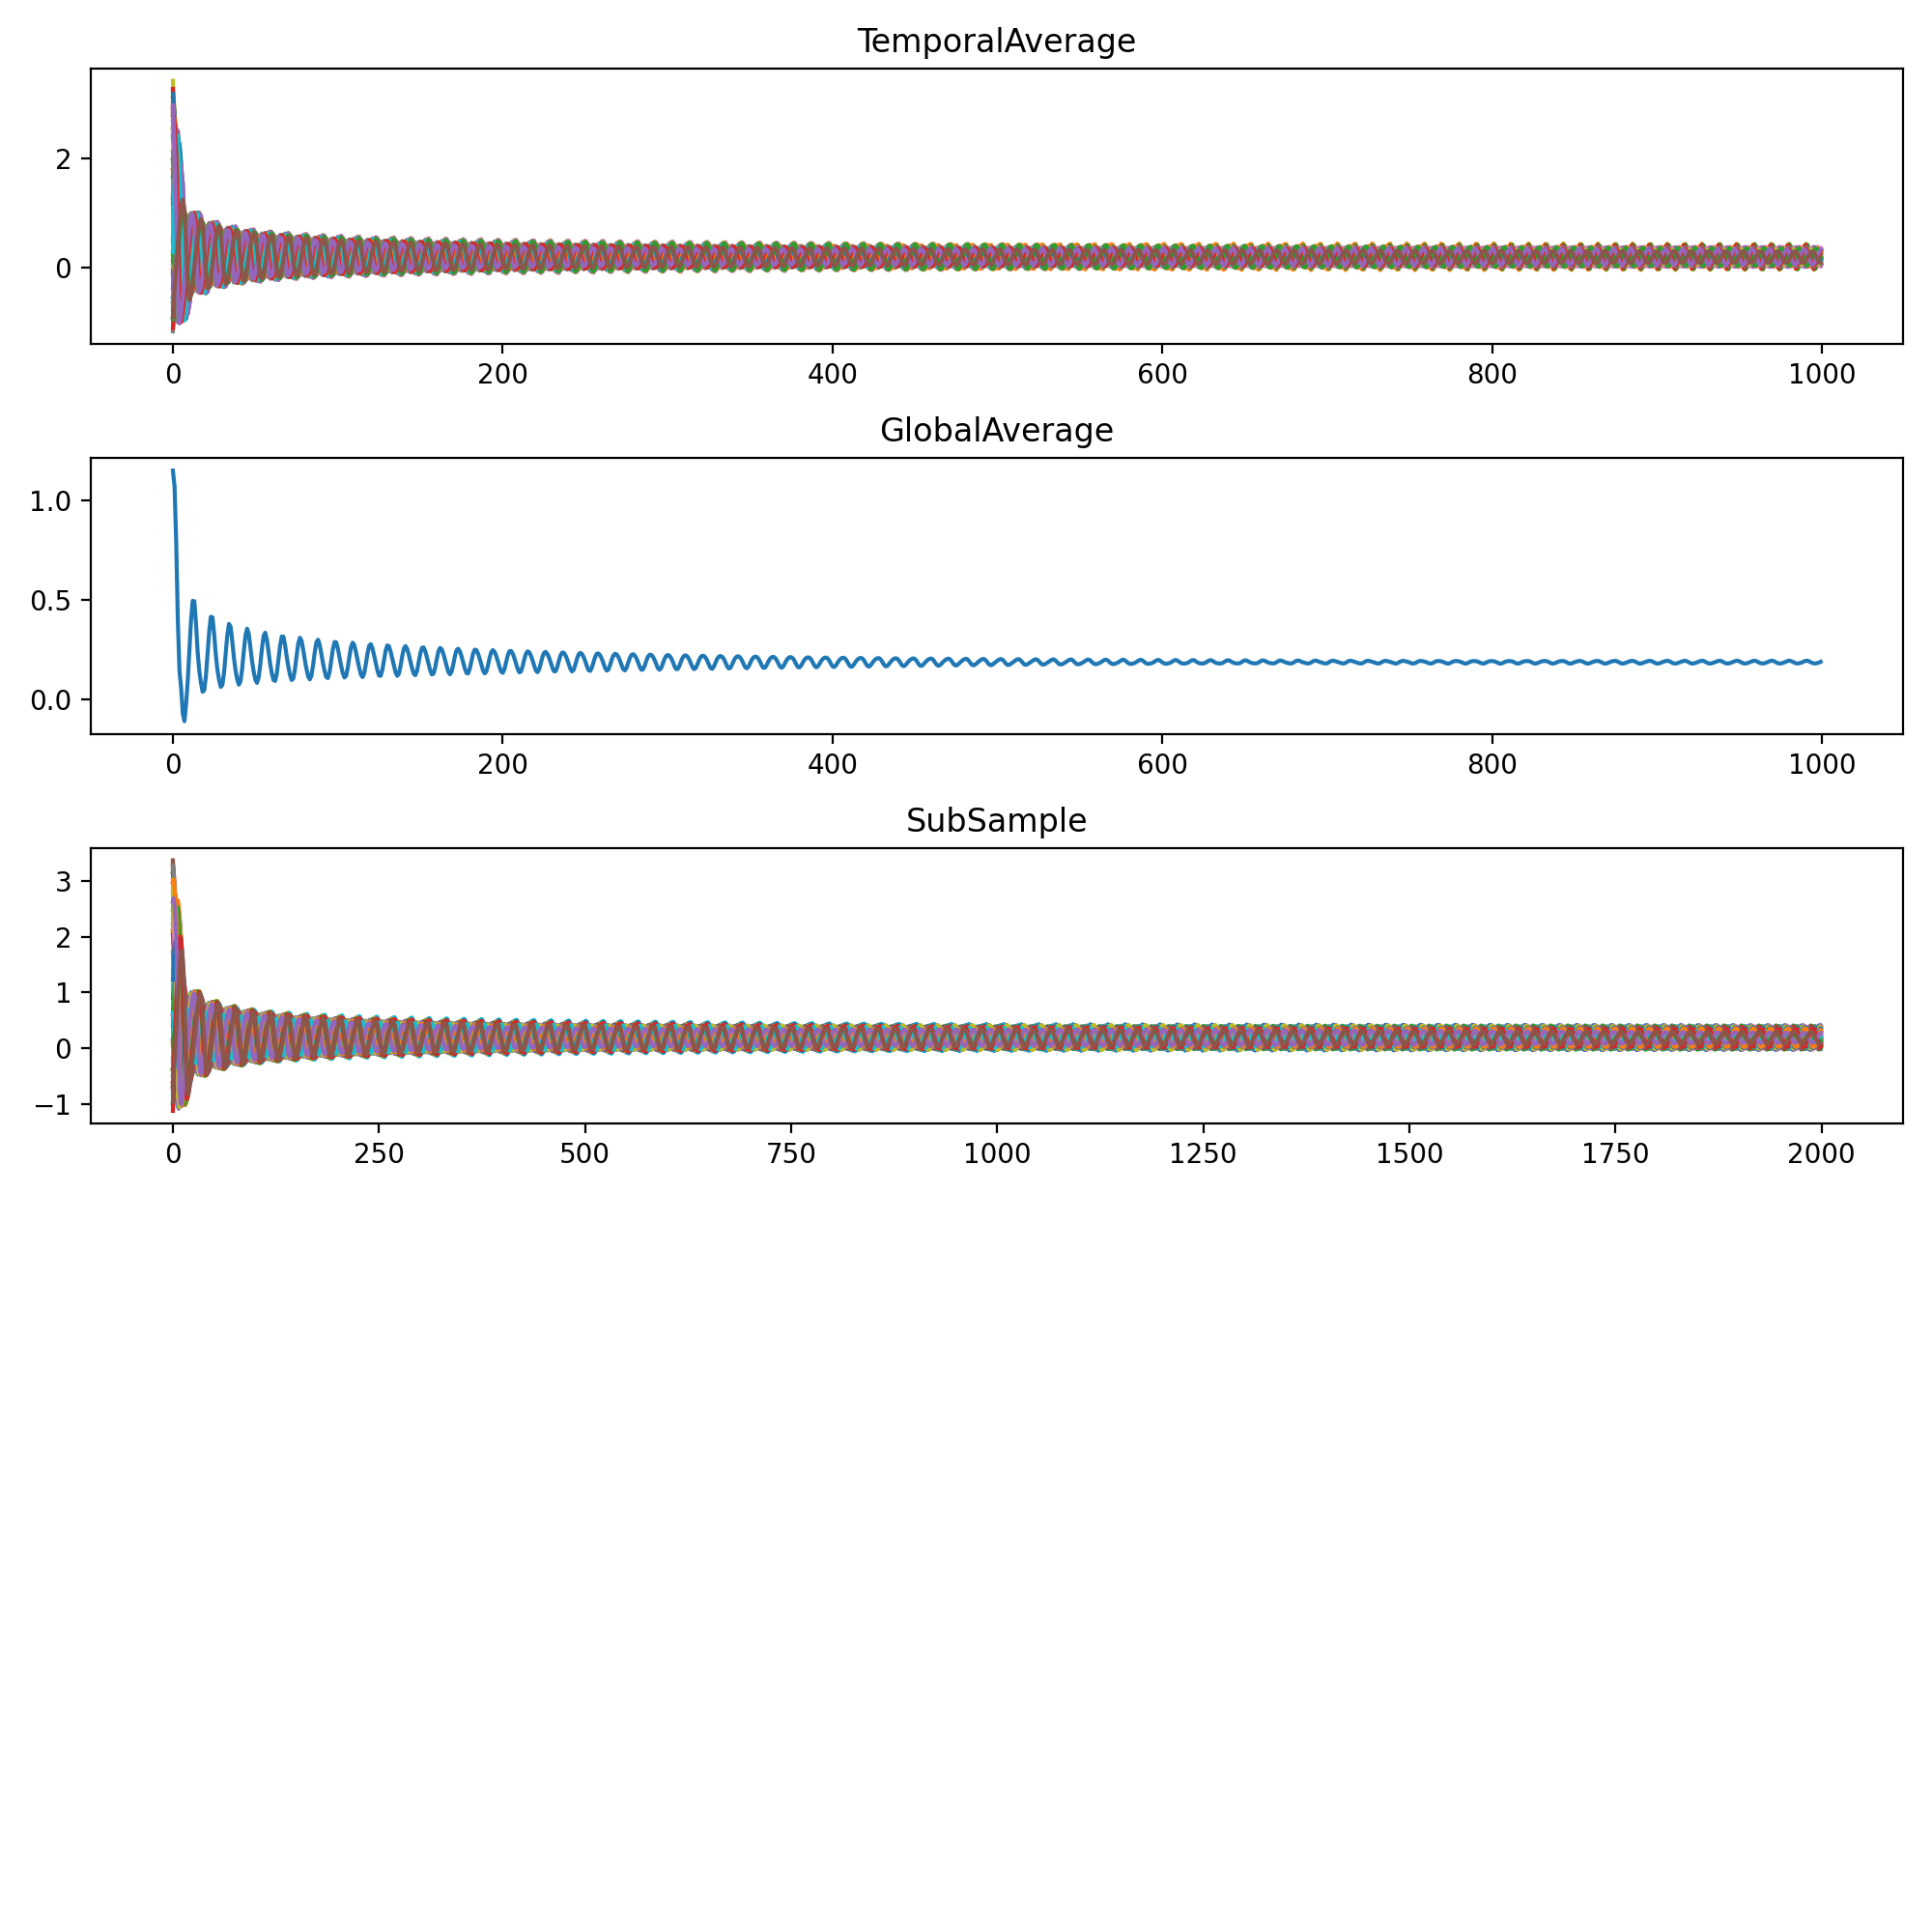

In [28]:
plt.figure(7, figsize=(10,10) )

for idx, mon in enumerate(basic_monitors):
    plt.subplot(len(t_series), 1, idx+1)
    plt.title(mon.summary_info()['Type'])
    plt.plot(t_series2[idx][:,0,:,0])
    
plt.tight_layout()
plt.show()

###### Task 2: change the periods of the monitors to better understand their role and differences and display the plots below, look at the output for different monitors and see if you can spot the differences
        - resulting from choosing different periods
        - differences between monitors 
        - try using the cell above or its copy to display:
        - single node timeseries for all the integration schemes
        - display just the first or last 3 seconds of simulation for selected nodes
        - change the noise paramter n_sig in the stochastic integrators definition and see how it affects the output of stochastic simulations


### EEG and BOLD monitors

In [29]:
import tvb.datatypes.projections as projections

In [30]:
ss = sensors.SensorsEEG.from_file(source_file="eeg_unitvector_62.txt")
pr = projections.ProjectionSurfaceEEG(projection_data = sio.loadmat(tvb_data+
    'projectionMatrix/projection_eeg_62_surface_16k.mat')['ProjectionMatrix'])
rm = region_mapping.RegionMapping(array_data = numpy.array(numpy.loadtxt(tvb_data+
    'regionMapping/regionMapping_16k_76.txt', dtype='int64')))

mon_EEG = monitors.EEG(projection=pr,
                       sensors=ss, 
                       region_mapping=rm,
                       period=50) 

mon_bold = monitors.Bold(period=500) 


In [31]:
what_to_watch = [mon_tavg, mon_EEG, mon_bold]

sim = simulator.Simulator(model=oscillator, connectivity=def_conn, coupling=global_coupling, 
                          integrator=heun_stoch, 
                          monitors=what_to_watch)

sim.configure()
(ttavg, tavg), (teeg, eeg), (tbold, bold) = sim.run(simulation_length=12000)

   INFO  Projection configured gain shape (62, 76)


In [32]:
print(tavg.shape)
print(eeg.shape)
print(bold.shape)

(12000, 1, 76, 1)
(240, 1, 62, 1)
(24, 1, 76, 1)


<IPython.core.display.Javascript object>


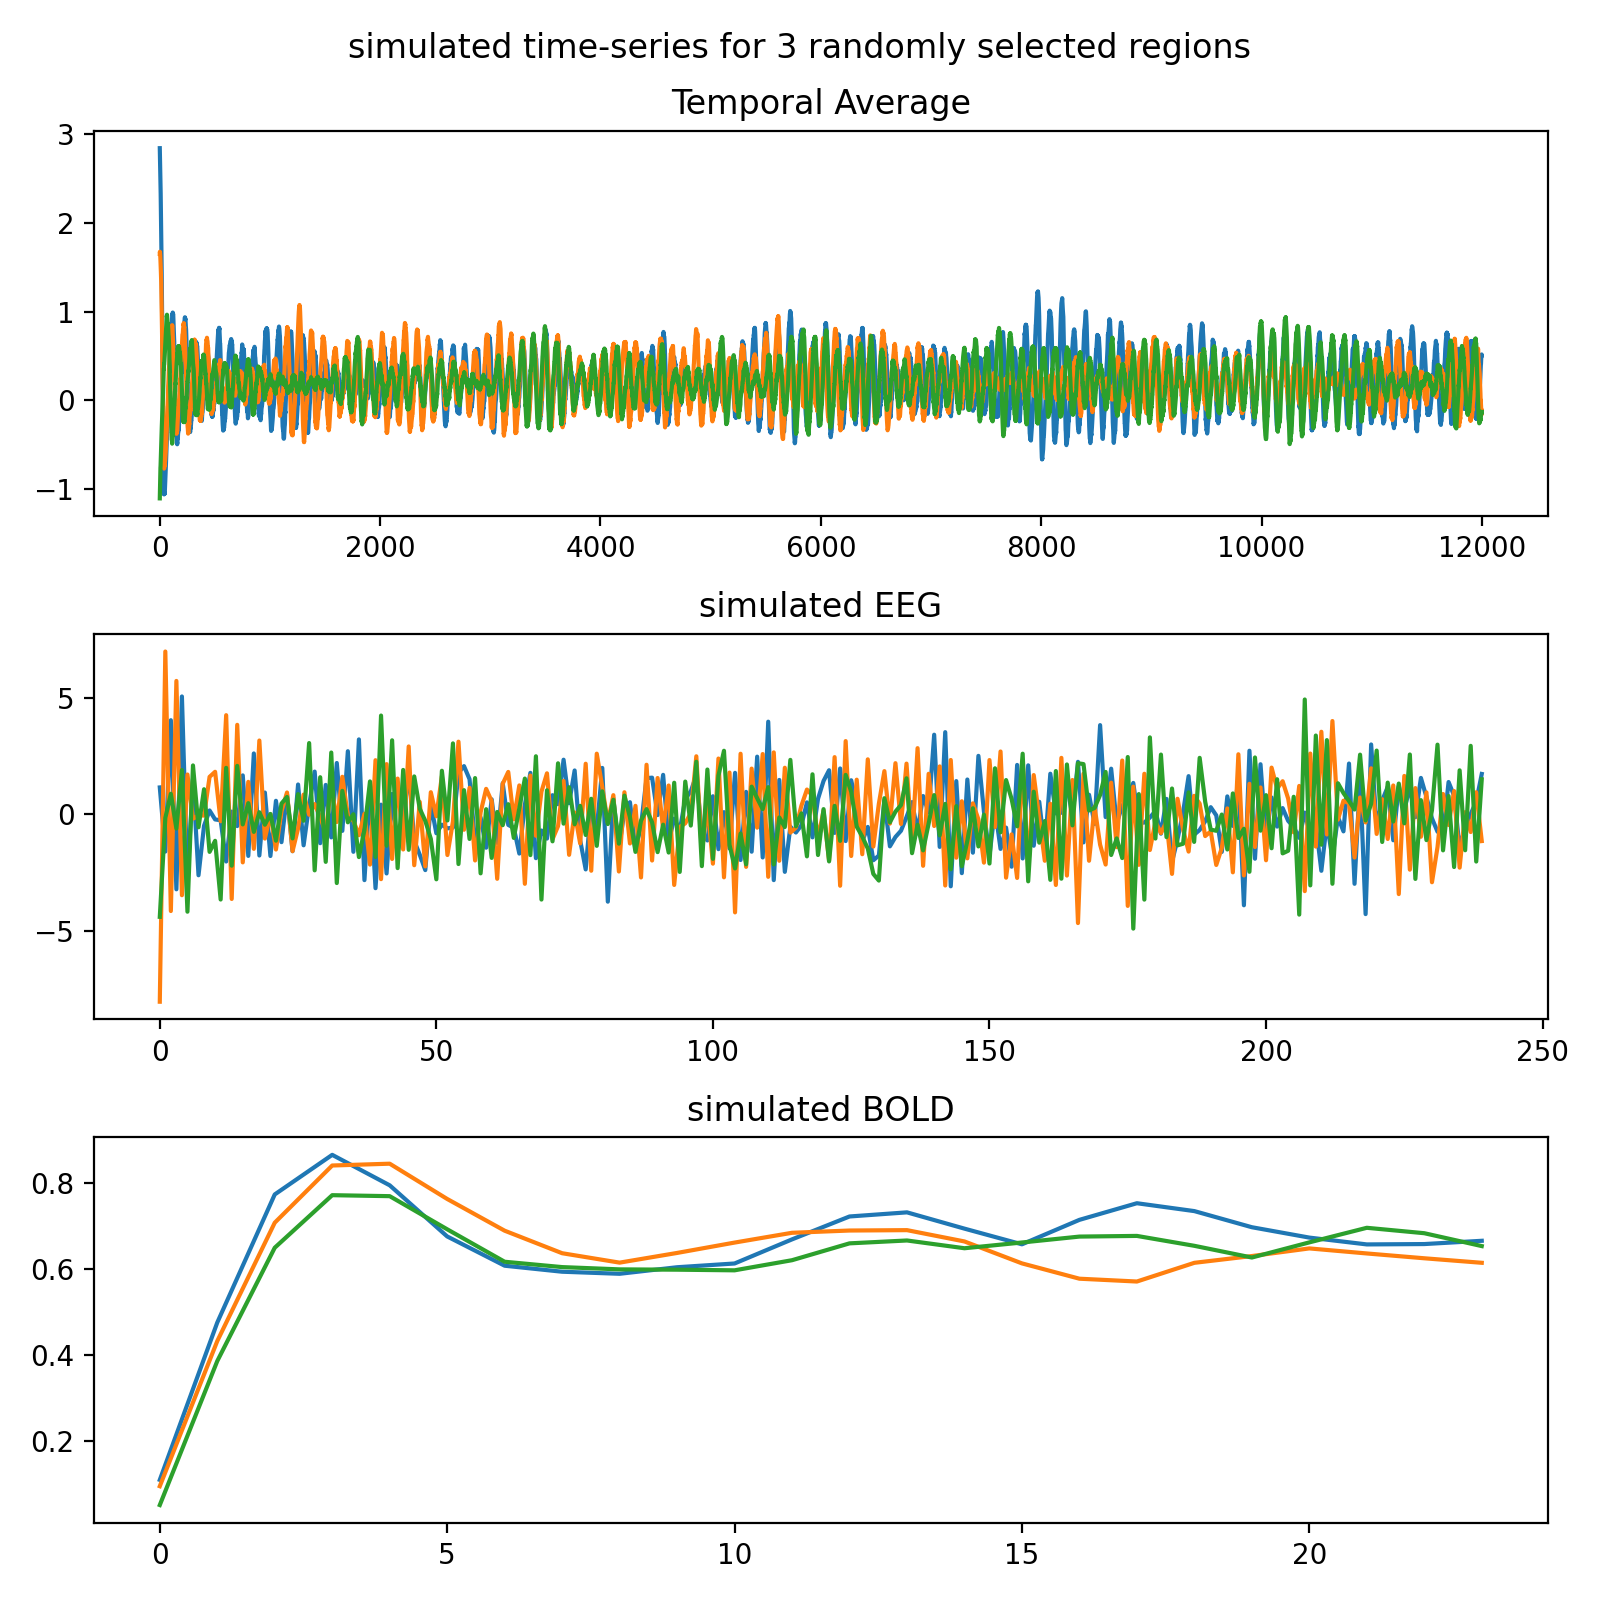

In [34]:
plt.figure(8, figsize=(8,8))
plt.suptitle('simulated time-series for 3 randomly selected regions')
plt.subplot(311)
plt.title('Temporal Average')
plt.plot(tavg[:,0,24:27,0])
plt.subplot(312)
plt.title('simulated EEG')
plt.plot(eeg[:,0,24:27,0]) # NOTE: the number of measurements corresponds to a number of sensors #not the nodes in the connectome
plt.subplot(313)
plt.title('simulated BOLD')
plt.plot(bold[:,0,24:27,0])
plt.tight_layout()

### next steps:
- for the EEG data analysis would be to analyze the signal, first thing you could do would be to get the dominant frequency from the signal. Here is example code showing how to do that.
- for the BOLD signal you could construct the Functional Connectivity Matrix to see how strongly the activity across the different nodes is correlated. - with our example doing that woudld not be very informative as we are using a very basic model and a basic connectome but just wanted to give you an idea on where this could go in the next few steps:
- testing how different coupling, or model parameters affect the FC matrix and its silimarity to empirically obtained FC is one way of exploring the dynamics of your model and the properties of your connectome.

In [35]:
one_electrode_eeg = eeg[:,0,30,0]

from scipy import signal # you may need to install scipy by running (if you need help with that just let me know)
# Define sampling frequency and time vector
sf = 50.
time = numpy.arange(one_electrode_eeg.size) / sf
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(one_electrode_eeg, sf, nperseg=win)

###### Plot the power spectrum

<IPython.core.display.Javascript object>


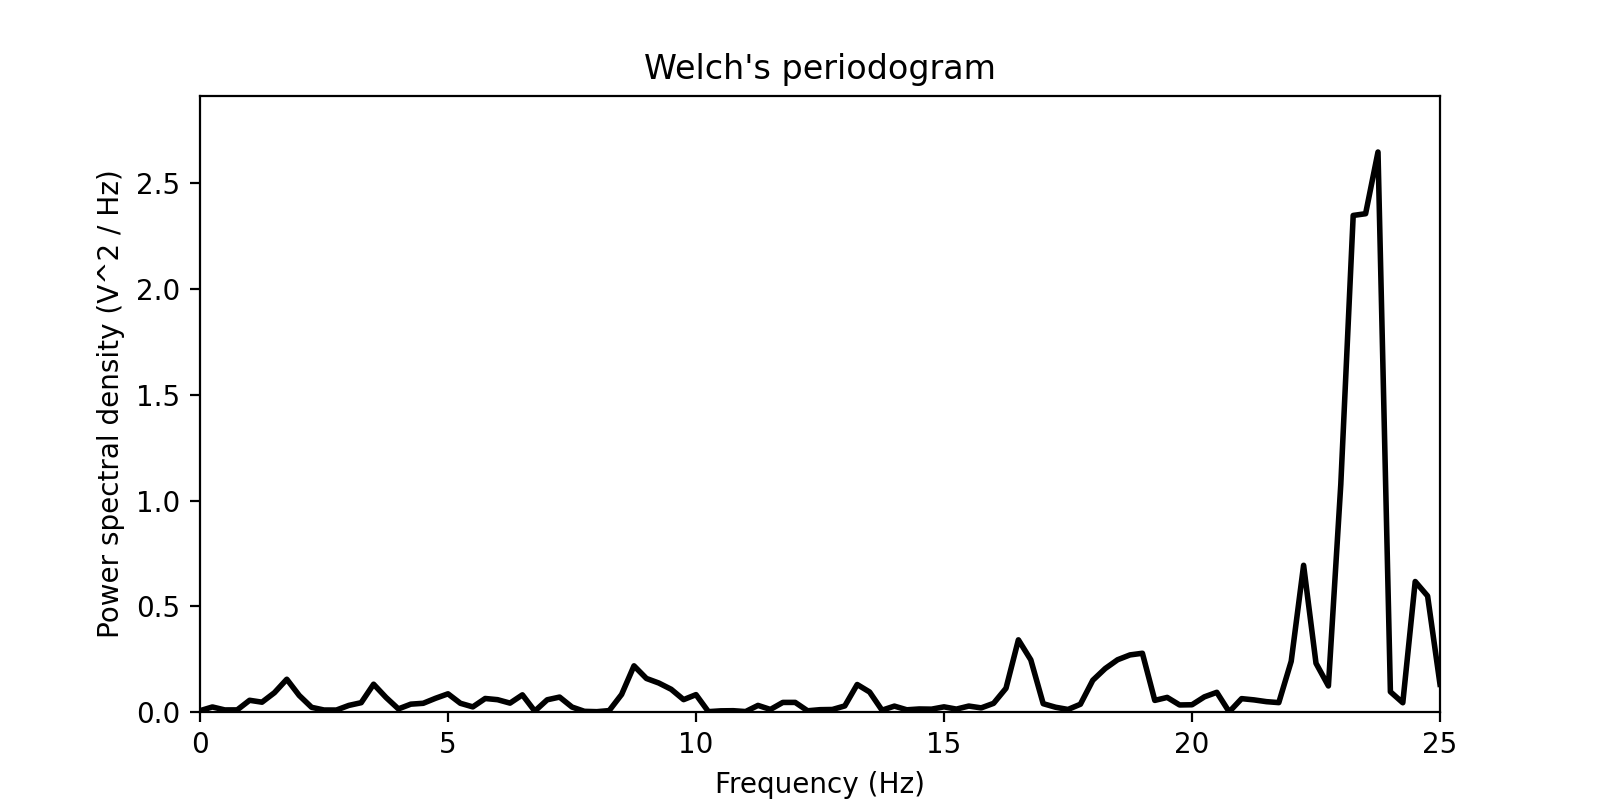

(0.0, 25.0)

In [36]:
plt.figure(9,figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])

###### Generating and plotting BOLD FC 

<IPython.core.display.Javascript object>


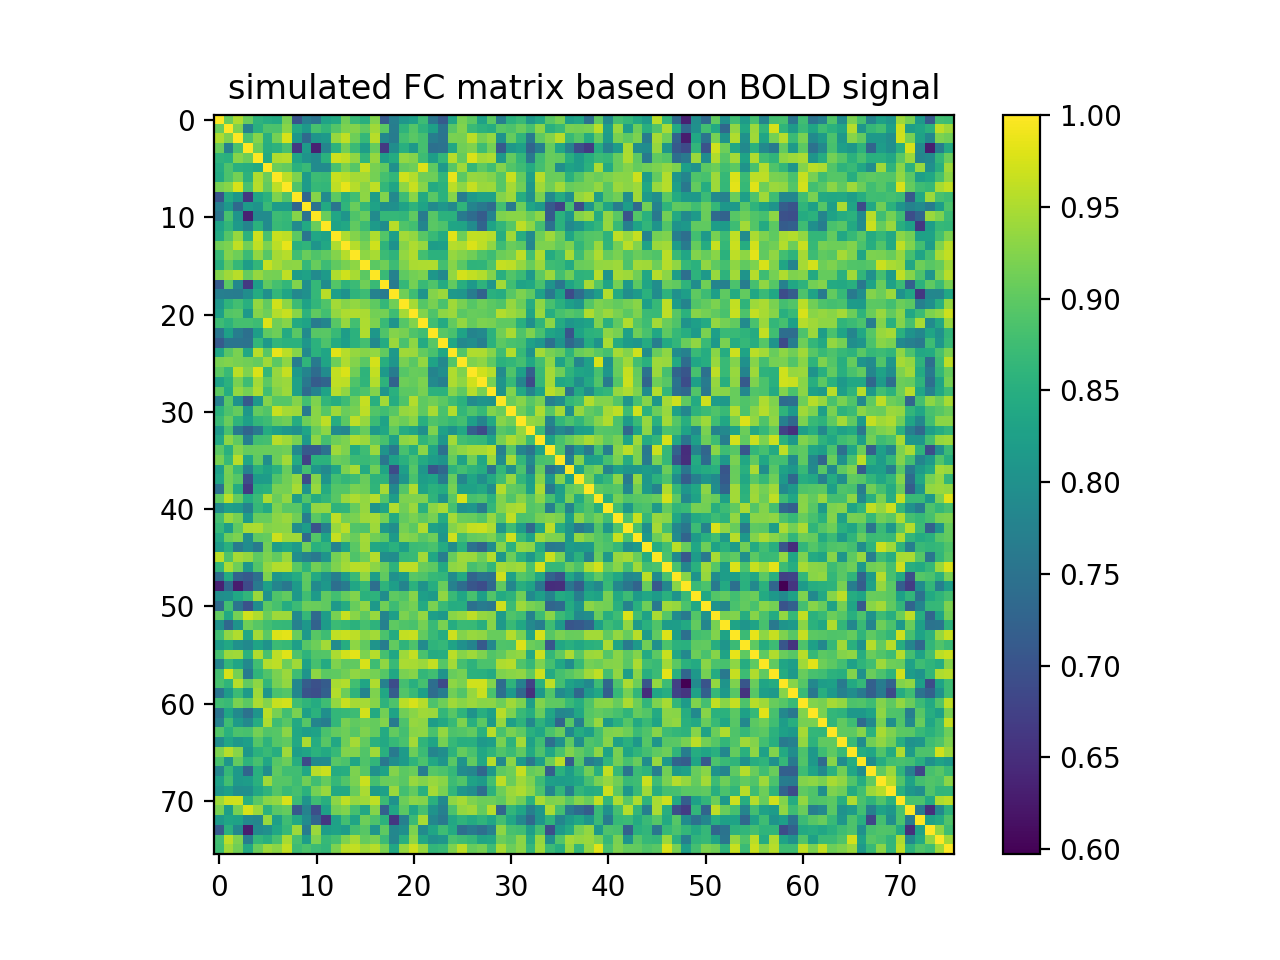

In [37]:
def calc_FC(timeseries):
    return numpy.corrcoef(timeseries.T)

toy_FC = (calc_FC(bold[:,0,:,0]))
plt.figure(10)
plt.title('simulated FC matrix based on BOLD signal')
plt.imshow(toy_FC)
plt.colorbar()

### Questions:

- Q: how to choose the coupling function and the integrator?
- Q: how do I know if my simulation with a certain parameter set is realistic? 
- Q: how can I use the PhasePlaneInteractive plot for my simulation? 

- practical introduction into the process of getting started with using TVB for a project. 
- Q: What needs to be considered/what questions should one ask oneself at the start of the project,
    (e.g.: how to choose which mean field model to use)? 
    What are common issues that come up?

